<a href="https://colab.research.google.com/github/TeganShaw44/ENGR7761Tegan/blob/main/PlantClassificationCNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install dependencies and import libraries**

In [2]:
import numpy as np
import os
import glob as gb
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from google.colab import drive

**Mount the google drive and establish dataset location**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
TRAIN_DIR = "/content/drive/MyDrive/Training"
TEST_DIR = "/content/drive/MyDrive/Testing"
BATCH_SIZE=64

**Count the files of each folder; both training and testing**

In [5]:
for folder in os.listdir(TRAIN_DIR):
  pngfiles = gb.glob(pathname=str(TRAIN_DIR + "/" + folder + "/*.png"))
  jpgfiles = gb.glob(pathname=str(TRAIN_DIR + "/" + folder + "/*.jpg"))
  files = pngfiles + jpgfiles
  print (f"For training data, found {len(files)} in folder {folder}")

For training data, found 1117 in folder trees
For training data, found 603 in folder flowers
For training data, found 0 in folder testingImage1.jpg
For training data, found 0 in folder testingImage2.jpg


In [6]:
for folder in os.listdir(TEST_DIR):
  pngfiles = gb.glob(pathname=str(TEST_DIR + "/" + folder + "/*.png"))
  jpgfiles = gb.glob(pathname=str(TEST_DIR + "/" + folder + "/*.jpg"))
  files = pngfiles + jpgfiles
  print (f"For testing data, found {len(files)} in folder {folder}")

For testing data, found 245 in folder trees
For testing data, found 176 in folder flowers


**View random images of each class**

Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


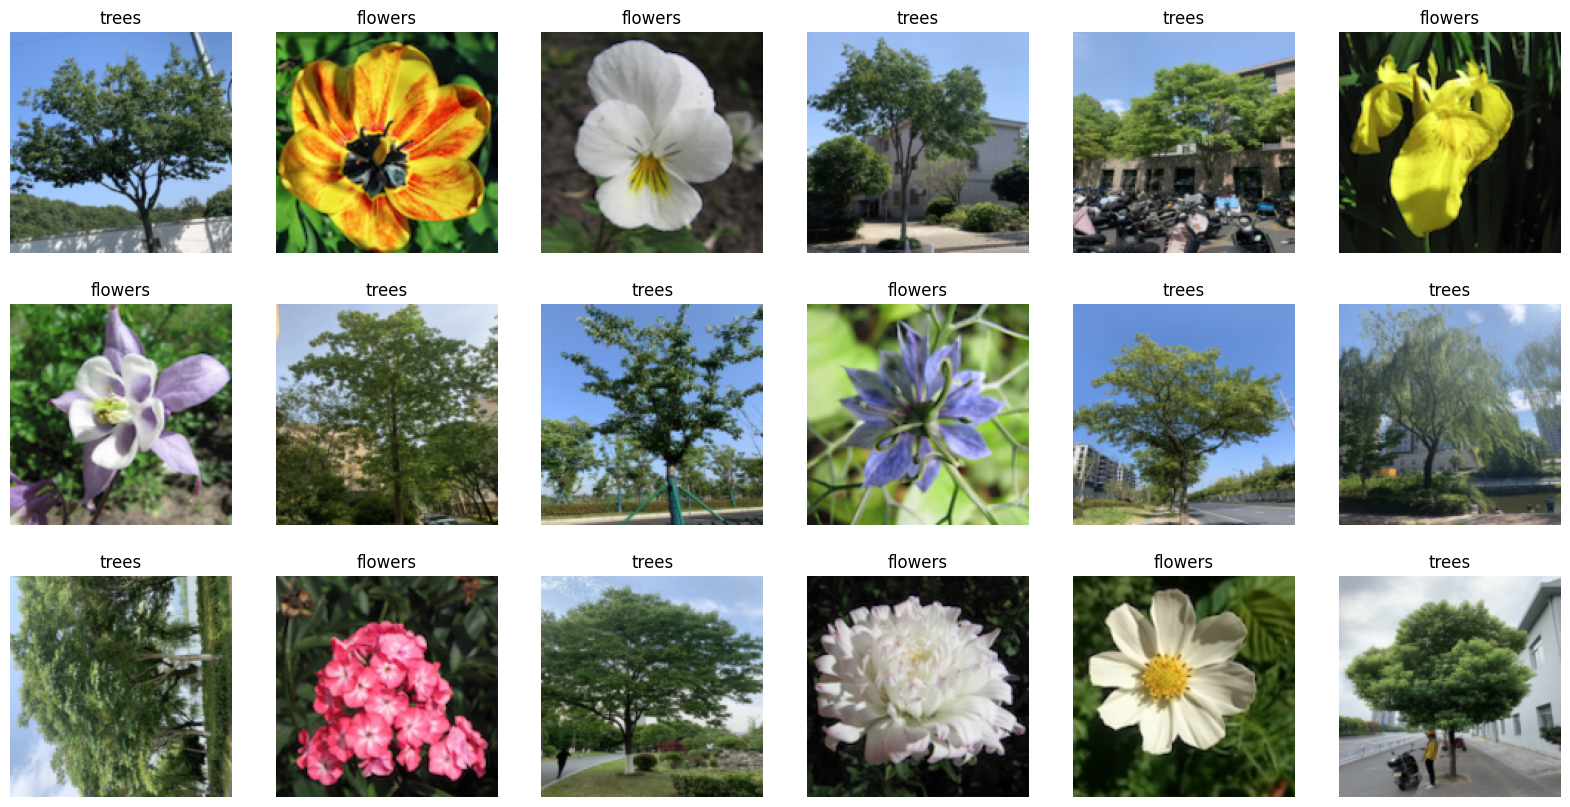

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

def showRandom(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    #Read image in
    img = mpimg.imread(target_folder+'/'+random_image[0])

    #Change RGBA to RGB
    if img.shape[-1] == 4:
        img = img[..., :3]

    # Resize the image to (150, 150)
    img_resized = resize(img, (150, 150))

    plt.imshow(img_resized)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img_resized.shape}")

    return img_resized

class_names = ["flowers", "trees"]
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = showRandom(target_dir="/content/drive/MyDrive/Training/", target_class=class_name)

**Preprocessing the data for training**

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_data = ImageDataGenerator(rescale = 1/255)

train_set = train_data.flow_from_directory(TRAIN_DIR, target_size = (150, 150), batch_size = BATCH_SIZE, class_mode = "categorical")
test_set = test_data.flow_from_directory(TEST_DIR, target_size = (150, 150), batch_size = BATCH_SIZE, class_mode = "categorical")

Found 1735 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


**Creating the CNN Model**

In [11]:
from keras.regularizers import l2

CNNmodel = Sequential()

#Convolution and Pooling
CNNmodel.add(Conv2D(filters=16,kernel_size=(3,3),input_shape = (150,150,3),activation = 'relu'))
CNNmodel.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolutional Layer and Pooling
CNNmodel.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
CNNmodel.add(MaxPooling2D(pool_size=(2,2)))

#Flattening Layer
CNNmodel.add(Flatten())

#Full connection Layers
CNNmodel.add(Dense(units = 150, activation = 'relu', kernel_regularizer=l2(0.01)))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(units = 2, activation = 'softmax'))

#Compiling the model=
CNNmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 150)              

**Training the CNN Model**

In [14]:
history = CNNmodel.fit(train_set, epochs = 25, validation_data = test_set)
CNNmodel.save("Model1.keras")

Epoch 1/25
28/28 [==============================] - ETA: 0s - loss: 1.4209 - accuracy: 0.8772 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/28 [==============================] - 747s 27s/step - loss: 1.4209 - accuracy: 0.8772 - val_loss: 1.1507 - val_accuracy: 0.8052
Epoch 2/25
28/28 [==============================] - 85s 3s/step - loss: 0.3537 - accuracy: 0.9896 - val_loss: 0.6157 - val_accuracy: 0.9121
Epoch 3/25
28/28 [==============================] - 81s 3s/step - loss: 0.1659 - accuracy: 0.9914 - val_loss: 0.5403 - val_accuracy: 0.9264
Epoch 4/25
28/28 [==============================] - 84s 3s/step - loss: 0.1223 - accuracy: 0.9937 - val_loss: 0.5107 - val_accuracy: 0.9097
Epoch 5/25
28/28 [==============================] - 80s 3s/step - loss: 0.0838 - accuracy: 0.9960 - val_loss: 0.7119 - val_accuracy: 0.8195
Epoch 6/25
28/28 [==============================] - 87s 3s/step - loss: 0.0940 - accuracy: 0.9925 - val_loss: 0.8075 - val_accuracy: 0.8409
Epoch 7/25
28/28 [==============================] - 85s 3s/step - loss: 0.0917 - accuracy: 0.9914 - val_loss: 0.4719 - val_accuracy: 0.9264
Epoch 8/25
28/28 [===========

In [15]:
CNNmodel.evaluate(test_set)

7/7 [==============================] - 14s 2s/step - loss: 0.7796 - accuracy: 0.9074


[0.7796128392219543, 0.9073634147644043]

Text(0, 0.5, 'Loss')

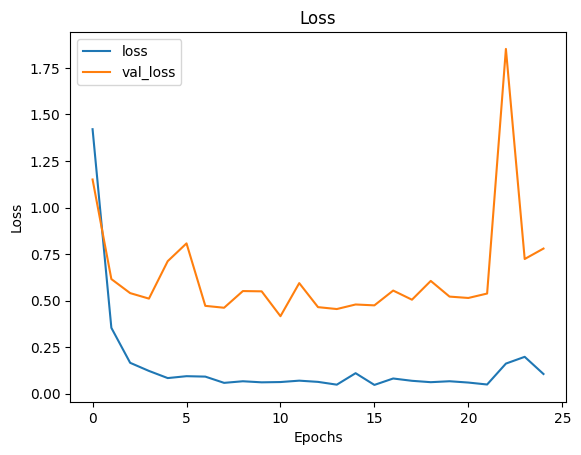

In [16]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

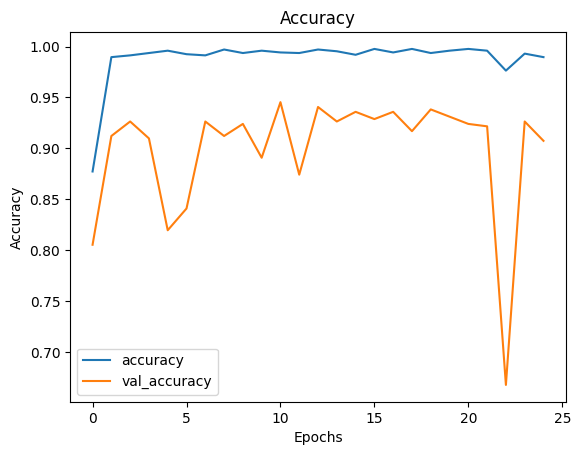

In [17]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

**Testing the CNN model**

1/1 [==============================] - 0s 151ms/step


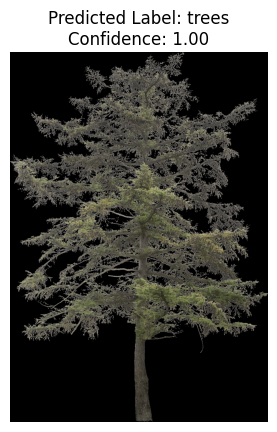

In [18]:
model_path = "Model1.keras"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/drive/MyDrive/Testing/trees/meye_larix-kaempferi_s15337.png")
#image = cv2.imread("/content/drive/MyDrive/Testing/flowers/cartoon-flower_187299-9646.jpg")
#image = cv2.imread("/content/drive/MyDrive/testingImage1.jpg")
#image = cv2.imread("/content/drive/MyDrive/testingImage2.jpg")
#image = cv2.imread("/content/drive/MyDrive/testingImage3.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((150, 150))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()

predicted_label = class_names[result]
confidence = pred[0][result]

# Display the image and its predicted label
plt.imshow(image_rgb)
plt.title(f"Predicted Label: {predicted_label}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()